# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings as war


In [2]:
war

<module 'warnings' from '/usr/lib/python3.11/warnings.py'>

In [3]:
pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 67.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [4]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!pip install matplotlib==3.10.0

In [6]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Try loading one file

df = pd.read_parquet(r'/content/drive/MyDrive/NYC TAXI/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

In [9]:
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1               2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2               2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3               1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4               2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
...           ...                  ...                   ...              ...   
3066761         2  2023-01-31 23:58:34   2023-02-01 00:12:33              NaN   
3066762         2  2023-01-31 23:31:09   2023-01-31 23:50:36              NaN   
3066763         2  2023-01-31 23:01:05   2023-01-31 23:25:36              NaN   
3066764         2  2023-01-31 23:40:00   2023-01-31 23:53:00              NaN   
3066765         2  2023-01-31 23:07:32   2023-01-31 23:21:56              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 0.97         1.0                  N           161   
1                 1.10         1.0                  N            43   
2                 2.51         1.0                  N            48   
3                 1.90         1.0                  N           138   
4                 1.43         1.0                  N           107   
...                ...         ...                ...           ...   
3066761           3.05         NaN               None           107   
3066762           5.80         NaN               None           112   
3066763           4.67         NaN               None           114   
3066764           3.15         NaN               None           230   
3066765           2.85         NaN               None           262   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 141             2         9.30   1.00      0.5        0.00   
1                 237             1         7.90   1.00      0.5        4.00   
2                 238             1        14.90   1.00      0.5       15.00   
3                   7             1        12.10   7.25      0.5        0.00   
4                  79             1        11.40   1.00      0.5        3.28   
...               ...           ...          ...    ...      ...         ...   
3066761            48             0        15.80   0.00      0.5        3.96   
3066762            75             0        22.43   0.00      0.5        2.64   
3066763           239             0        17.61   0.00      0.5        5.32   
3066764            79             0        18.15   0.00      0.5        4.43   
3066765           143             0        15.97   0.00      0.5        2.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         14.30   
1                 0.0                    1.0         16.90   
2                 0.0                    1.0         34.90   
3                 0.0                    1.0         20.85   
4                 0.0                    1.0         19.68   
...               ...                    ...           ...   
3066761           0.0                    1.0         23.76   
3066762           0.0                    1.0         29.07   
3066763           0.0                    1.0         26.93   
3066764           0.0                    1.0         26.58   
3066765           0.0                    1.0         21.97   

         congestion_surcharge  airport_fee  
0                         2.5         0.00  
1                         2.5         0.00  
2                         2.5         0.00  
3                         0.0         1.25  
4                         2.5         0.00  
...                       ...          ...  
3066761                   NaN          NaN  
3066762                   NaN          NaN  
3066763                   NaN          NaN  
3066764                   N

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [10]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

In [12]:
import os
# Select the folder having data filesimport os
os.chdir('/content/drive/MyDrive/')
os.getcwd()

'/content/drive/MyDrive'

In [13]:
file_list = os.listdir('NYC TAXI') #entire list of the data files
file_list

['2023-1.parquet',
 '2023-2.parquet',
 '2023-3.parquet',
 '2023-4.parquet',
 '2023-5.parquet',
 '2023-6.parquet',
 '2023-7.parquet',
 '2023-8.parquet',
 '2023-9.parquet',
 '2023-11.parquet',
 '2023-12.parquet',
 'new_taxi_data_300k.csv',
 'small_sample.csv',
 'new_taxi_data.csv']

In [14]:
# path to NYC Taxi data directory
data_dir = '/content/drive/MyDrive/NYC TAXI'  # Replaced with the actual path

# empty list to store sampled dataframes
sampled_data_list = []

# Looping through each Parquet file in the directory
for filename in os.listdir(data_dir):
    if filename.endswith('.parquet'):
        filepath = os.path.join(data_dir, filename)

        # Reading the Parquet file into a pandas DataFrame
        monthly_data = pd.read_parquet(filepath)

        # Extracting date and hour from pickup datetime
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(
            monthly_data['tpep_pickup_datetime'], errors='coerce')
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['hour'] = monthly_data['tpep_pickup_datetime'].dt.hour

        #  Sampling 5% of records for each hour of each date
        sampled_data = pd.DataFrame()
        for (date, hour), hour_data in monthly_data.groupby(['date', 'hour']):
            sample = hour_data.sample(frac=0.05, random_state=42)
            sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        # Appending the sampled data to the list
        sampled_data_list.append(sampled_data)

# Concatenating all sampled dataframes into one single dataframe
df = pd.concat(sampled_data_list, ignore_index=True)

df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
...           ...                  ...                   ...              ...   
1722140         2  2023-12-31 23:44:09   2023-12-31 23:50:04              1.0   
1722141         2  2023-12-31 23:44:04   2024-01-01 00:03:36              1.0   
1722142         2  2023-12-31 23:37:20   2023-12-31 23:41:18              1.0   
1722143         1  2023-12-31 23:12:30   2023-12-31 23:21:12              NaN   
1722144         2  2023-12-31 23:35:11   2024-01-01 00:15:03              5.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 0.86         1.0                  N           141   
1                 7.74         1.0                  N           138   
2                 1.24         1.0                  N           161   
3                 1.44         1.0                  N           237   
4                 0.54         1.0                  N           143   
...                ...         ...                ...           ...   
1722140           0.81         1.0                  N           263   
1722141           5.78         1.0                  N           161   
1722142           1.06         1.0                  N            79   
1722143           0.00         NaN               None           166   
1722144           8.45         1.0                  N           142   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0                 140             1  ...      0.5        2.00           0.0   
1                 256             2  ...      0.5        0.00           0.0   
2                 237             1  ...      0.5        2.58           0.0   
3                 141             2  ...      0.5        0.00           0.0   
4                 142             2  ...      0.5        0.00           0.0   
...               ...           ...  ...      ...         ...           ...   
1722140           262             1  ...      0.5        2.44           0.0   
1722141           261             1  ...      0.5        4.00           0.0   
1722142           137             1  ...      0.5        2.44           0.0   
1722143           244             0  ...      0.5        0.00           0.0   
1722144           261             2  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         13.50                   2.5   
1                          1.0         41.15                   0.0   
2                          1.0         15.48                   2.5   
3                          1.0         16.40                   2.5   
4                          1.0         11.50                   2.5   
...                        ...           ...                   ...   
1722140                    1.0         14.64                   2.5   
1722141                    1.0         36.50                   2.5   
1722142                    1.0         14.64                   2.5   
1722143                    1.0         16.14                   NaN   
1722144                    1.0         45.80                   2.5   

         airport_fee        date  hour Airport_fee  
0               0.00  2022-12-31    23         NaN  
1               1.25  2023-01-01     0         NaN  
2               0.00  2023-01-01     0         NaN  
3               0.00  2023-01-01     0         NaN  
4               0.00  2023-01-01     0         NaN  
...              ...         ...   ...         ...  
1722140          NaN  

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [15]:
df.to_csv('new_taxi_data.csv', index=False)# converted entire sampled data to csv
df.sample(n=300000, random_state=42) # extracted 3lacs rows as per instrcutions
small_sample=df.sample(n=300000, random_state=42)
small_sample.to_csv('small_sample.csv', index=False) #3 lacs rows dataset converted to csv

In [16]:
small_sample

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
728589          1  2023-02-21 12:45:01   2023-02-21 13:17:01              1.0   
384760          1  2023-06-12 13:02:20   2023-06-12 13:11:18              1.0   
863630          2  2023-04-18 22:19:32   2023-04-18 22:26:56              1.0   
709183          2  2023-02-17 11:04:39   2023-02-17 11:11:30              1.0   
768385          1  2023-02-28 22:19:20   2023-02-28 22:22:52              1.0   
...           ...                  ...                   ...              ...   
350072          2  2023-06-06 10:58:43   2023-06-06 11:04:55              1.0   
522069          2  2023-08-09 08:53:25   2023-08-09 09:01:55              1.0   
1329137         2  2023-09-16 01:13:26   2023-09-16 01:20:40              1.0   
95516           1  2023-01-20 19:08:29   2023-01-20 19:18:20              1.0   
500522          1  2023-08-04 10:39:32   2023-08-04 10:50:47              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
728589            4.50         1.0                  N           125   
384760            1.30         1.0                  N           229   
863630            1.52         1.0                  N           142   
709183            0.97         1.0                  N           236   
768385            0.30         1.0                  N           236   
...                ...         ...                ...           ...   
350072            0.83         1.0                  N           107   
522069            1.50         1.0                  N           238   
1329137           1.93         1.0                  N           261   
95516             1.30         1.0                  N            79   
500522            1.60         1.0                  N           141   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
728589            142             1  ...      0.5        9.45           0.0   
384760            137             1  ...      0.5        1.20           0.0   
863630            236             1  ...      0.5        3.00           0.0   
709183            141             1  ...      0.5        2.52           0.0   
768385            237             1  ...      0.5        2.00           0.0   
...               ...           ...  ...      ...         ...           ...   
350072            113             1  ...      0.5        3.57           0.0   
522069            166             1  ...      0.5        2.94           0.0   
1329137           158             2  ...      0.5        0.00           0.0   
95516             234             1  ...      0.5        3.16           0.0   
500522            162             2  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
728589                     1.0         40.95                   2.5   
384760                     1.0         15.20                   2.5   
863630                     1.0         18.00                   2.5   
709183                     1.0         15.12                   2.5   
768385                     1.0         11.40                   2.5   
...                        ...           ...                   ...   
350072                     1.0         15.47                   2.5   
522069                     1.0         17.64                   2.5   
1329137                    1.0         15.70                   2.5   
95516                      1.0         18.96                   2.5   
500522                     1.0         16.10                   2.5   

         airport_fee        date  hour Airport_fee  
728589           NaN  2023-02-21    12         0.0  
384760           NaN  2023-06-12    13         0.0  
863630           NaN  2023-04-18    22         0.0  
709183           NaN  2023-02-17    11         0.0  
768385           NaN  2023-02-28    22         0.0  
...              ...         ...   ...         ...  
350072           NaN  

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [17]:
# Load the new data file
df=pd.read_csv('small_sample.csv')


In [18]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-02-21 12:45:01   2023-02-21 13:17:01              1.0   
1         1  2023-06-12 13:02:20   2023-06-12 13:11:18              1.0   
2         2  2023-04-18 22:19:32   2023-04-18 22:26:56              1.0   
3         2  2023-02-17 11:04:39   2023-02-17 11:11:30              1.0   
4         1  2023-02-28 22:19:20   2023-02-28 22:22:52              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.50         1.0                  N           125           142   
1           1.30         1.0                  N           229           137   
2           1.52         1.0                  N           142           236   
3           0.97         1.0                  N           236           141   
4           0.30         1.0                  N           236           237   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        9.45           0.0   
1             1  ...      0.5        1.20           0.0   
2             1  ...      0.5        3.00           0.0   
3             1  ...      0.5        2.52           0.0   
4             1  ...      0.5        2.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         40.95                   2.5          NaN   
1                    1.0         15.20                   2.5          NaN   
2                    1.0         18.00                   2.5          NaN   
3                    1.0         15.12                   2.5          NaN   
4                    1.0         11.40                   2.5          NaN   

         date  hour Airport_fee  
0  2023-02-21    12         0.0  
1  2023-06-12    13         0.0  
2  2023-04-18    22         0.0  
3  2023-02-17    11         0.0  
4  2023-02-28    22         0.0  

[5 rows x 22 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        290042 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             290042 non-null  float64
 6   store_and_fwd_flag     290042 non-null  object 
 7   PULocationID           300000 non-null  int64  
 8   DOLocationID           300000 non-null  int64  
 9   payment_type           300000 non-null  int64  
 10  fare_amount            300000 non-null  float64
 11  extra                  300000 non-null  float64
 12  mta_tax                300000 non-null  float64
 13  tip_amount             300000 non-null  float64
 14  tolls_amount           300000 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [20]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)  # Reset index to a sequential order

columns_to_drop = ['VendorID', 'store_and_fwd_flag']
df = df.drop(columns=columns_to_drop)
df

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2023-02-21 12:45:01   2023-02-21 13:17:01              1.0   
1       2023-06-12 13:02:20   2023-06-12 13:11:18              1.0   
2       2023-04-18 22:19:32   2023-04-18 22:26:56              1.0   
3       2023-02-17 11:04:39   2023-02-17 11:11:30              1.0   
4       2023-02-28 22:19:20   2023-02-28 22:22:52              1.0   
...                     ...                   ...              ...   
299995  2023-06-06 10:58:43   2023-06-06 11:04:55              1.0   
299996  2023-08-09 08:53:25   2023-08-09 09:01:55              1.0   
299997  2023-09-16 01:13:26   2023-09-16 01:20:40              1.0   
299998  2023-01-20 19:08:29   2023-01-20 19:18:20              1.0   
299999  2023-08-04 10:39:32   2023-08-04 10:50:47              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                4.50         1.0           125           142             1   
1                1.30         1.0           229           137             1   
2                1.52         1.0           142           236             1   
3                0.97         1.0           236           141             1   
4                0.30         1.0           236           237             1   
...               ...         ...           ...           ...           ...   
299995           0.83         1.0           107           113             1   
299996           1.50         1.0           238           166             1   
299997           1.93         1.0           261           158             2   
299998           1.30         1.0            79           234             1   
299999           1.60         1.0           141           162             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0              27.5    2.5      0.5        9.45           0.0   
1              10.0    2.5      0.5        1.20           0.0   
2              10.0    1.0      0.5        3.00           0.0   
3               8.6    0.0      0.5        2.52           0.0   
4               4.4    3.5      0.5        2.00           0.0   
...             ...    ...      ...         ...           ...   
299995          7.9    0.0      0.5        3.57           0.0   
299996         10.7    0.0      0.5        2.94           0.0   
299997         10.7    1.0      0.5        0.00           0.0   
299998          9.3    5.0      0.5        3.16           0.0   
299999         12.1    2.5      0.5        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
0                         1.0         40.95                   2.5   
1                         1.0         15.20                   2.5   
2                         1.0         18.00                   2.5   
3                         1.0         15.12                   2.5   
4                         1.0         11.40                   2.5   
...                       ...           ...                   ...   
299995                    1.0         15.47                   2.5   
299996                    1.0         17.64                   2.5   
299997                    1.0         15.70                   2.5   
299998                    1.0         18.96                   2.5   
299999                    1.0         16.10                   2.5   

        airport_fee        date  hour  Airport_fee  
0               NaN  2023-02-21    12          0.0  
1               NaN  2023-06-12    13          0.0  
2               NaN  2023-04-18    22          0.0  
3               NaN  2023-02-17    11          0.0  
4               NaN  2023-02-28    22          0.0  
...             ...         ...   ...          ...  
299995          NaN  2023-06-06    10          0.0  
299996          NaN  2023-08-09     8          0.0  
299997          NaN  2023-09-16     1          0.0  
299998          0.0  2023-01-20    19          NaN  
299999          NaN  202

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [21]:
# Combine the two airport fee columns
# 1. Checking for columns containing 'airport_fee'
airport_fee_cols = [col for col in df.columns if 'airport_fee' in col.lower()]

# 2. If two columns are found:
if len(airport_fee_cols) == 2:
    # a. Create a new 'total_airport_fee' column by summing the existing ones:
    df['total_airport_fee'] = df[airport_fee_cols[0]] + df[airport_fee_cols[1]]

    # b. Drop the original redundant columns:
    df = df.drop(columns=airport_fee_cols)
df

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2023-02-21 12:45:01   2023-02-21 13:17:01              1.0   
1       2023-06-12 13:02:20   2023-06-12 13:11:18              1.0   
2       2023-04-18 22:19:32   2023-04-18 22:26:56              1.0   
3       2023-02-17 11:04:39   2023-02-17 11:11:30              1.0   
4       2023-02-28 22:19:20   2023-02-28 22:22:52              1.0   
...                     ...                   ...              ...   
299995  2023-06-06 10:58:43   2023-06-06 11:04:55              1.0   
299996  2023-08-09 08:53:25   2023-08-09 09:01:55              1.0   
299997  2023-09-16 01:13:26   2023-09-16 01:20:40              1.0   
299998  2023-01-20 19:08:29   2023-01-20 19:18:20              1.0   
299999  2023-08-04 10:39:32   2023-08-04 10:50:47              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                4.50         1.0           125           142             1   
1                1.30         1.0           229           137             1   
2                1.52         1.0           142           236             1   
3                0.97         1.0           236           141             1   
4                0.30         1.0           236           237             1   
...               ...         ...           ...           ...           ...   
299995           0.83         1.0           107           113             1   
299996           1.50         1.0           238           166             1   
299997           1.93         1.0           261           158             2   
299998           1.30         1.0            79           234             1   
299999           1.60         1.0           141           162             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0              27.5    2.5      0.5        9.45           0.0   
1              10.0    2.5      0.5        1.20           0.0   
2              10.0    1.0      0.5        3.00           0.0   
3               8.6    0.0      0.5        2.52           0.0   
4               4.4    3.5      0.5        2.00           0.0   
...             ...    ...      ...         ...           ...   
299995          7.9    0.0      0.5        3.57           0.0   
299996         10.7    0.0      0.5        2.94           0.0   
299997         10.7    1.0      0.5        0.00           0.0   
299998          9.3    5.0      0.5        3.16           0.0   
299999         12.1    2.5      0.5        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
0                         1.0         40.95                   2.5  2023-02-21   
1                         1.0         15.20                   2.5  2023-06-12   
2                         1.0         18.00                   2.5  2023-04-18   
3                         1.0         15.12                   2.5  2023-02-17   
4                         1.0         11.40                   2.5  2023-02-28   
...                       ...           ...                   ...         ...   
299995                    1.0         15.47                   2.5  2023-06-06   
299996                    1.0         17.64                   2.5  2023-08-09   
299997                    1.0         15.70                   2.5  2023-09-16   
299998                    1.0         18.96                   2.5  2023-01-20   
299999                    1.0         16.10                   2.5  2023-08-04   

        hour  total_airport_fee  
0         12                NaN  
1         13                NaN  
2         22                NaN  
3         11                NaN  
4         22                NaN  
...      ...                ...  
299995    10                NaN  
299996     8                NaN  
299997     1                NaN  
299998    19                NaN  
299999    10                NaN  

[300000 rows x 19 columns]

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [22]:
# check where values of fare amount are negative
negative_fare = df.loc[df['fare_amount'] < 0]
negative_fare


Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, total_airport_fee]
Index: []

In [23]:
# imputing outliers in fare_amount column with median
#Calculate the median of 'fare_amount'
fare_median = df['fare_amount'].median()

# Replace values greater than 10000 with the median
df.loc[df['fare_amount'] > 10000, 'fare_amount'] = fare_median
df.fare_amount.describe()

count    300000.000000
mean         19.817125
std          18.572623
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max        1375.000000
Name: fare_amount, dtype: float64

Did you notice something different in the `RatecodeID` column for above records?

In [24]:
# Analyse RatecodeID for the negative fare amounts
negative_ratecodes = negative_fare['RatecodeID'].value_counts()
print(negative_ratecodes)

Series([], Name: count, dtype: int64)


In [25]:
# Find which columns have negative values
for column in df.columns:
    if df[column].dtype in [np.int64, np.float64]:  # Check only numerical columns
        if (df[column] < 0).any():  # Checking for any negative value
            print(f'{column}')


mta_tax
improvement_surcharge
total_amount
congestion_surcharge


In [26]:
# fix these negative values
columns_to_fix = ['fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge']

for column in columns_to_fix:
    df[column] = df[column].abs()# Replacing negative values with their absolute values


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [27]:
# Find the proportion of missing values in each column
df.isnull().mean()


tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.033193
trip_distance            0.000000
RatecodeID               0.033193
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.033193
date                     0.000000
hour                     0.000000
total_airport_fee        1.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [28]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
rows_with_nulls = df.loc[df['passenger_count'].isnull()]
print(rows_with_nulls)

       tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
25      2023-01-12 19:14:47   2023-01-12 19:25:26              NaN   
113     2023-06-13 04:13:13   2023-06-13 04:42:00              NaN   
146     2023-01-08 12:41:17   2023-01-08 13:05:08              NaN   
184     2023-01-15 05:05:00   2023-01-15 05:22:00              NaN   
185     2023-09-05 11:41:08   2023-09-05 11:57:12              NaN   
...                     ...                   ...              ...   
299815  2023-11-15 21:40:00   2023-11-15 22:01:00              NaN   
299872  2023-06-28 22:38:00   2023-06-28 23:04:00              NaN   
299903  2023-02-20 07:41:44   2023-02-20 07:50:01              NaN   
299958  2023-03-18 11:11:45   2023-03-18 11:30:36              NaN   
299985  2023-12-24 19:02:12   2023-12-24 19:18:11              NaN   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
25               1.84         NaN           261           148             0   
1

In [29]:
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())  # Using median
print(df['passenger_count'])

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
299995    1.0
299996    1.0
299997    1.0
299998    1.0
299999    1.0
Name: passenger_count, Length: 300000, dtype: float64


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [30]:
# Fix missing values in 'RatecodeID'
# Imputing missing values in 'RatecodeID' with the most frequent value
most_frequent_ratecode = df['RatecodeID'].mode()  #the most frequent RatecodeID or mode
df['RatecodeID'] = df['RatecodeID'].fillna(most_frequent_ratecode)

print(df['RatecodeID'].isnull().sum()) # check if done will give 0

9958


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [31]:
# handle null values in congestion_surcharge
most_frequent_congestion_surcharge = df['congestion_surcharge'].median()  # median value being imputed
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(most_frequent_congestion_surcharge)
print(df['congestion_surcharge'].isnull().sum()) # check if done will give 0

0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [32]:
# Handle any remaining missing values
missing_values = df.isnull().sum()
print(missing_values)

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count               0
trip_distance                 0
RatecodeID                 9958
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
date                          0
hour                          0
total_airport_fee        300000
dtype: int64


In [33]:
df['total_airport_fee'] = df['total_airport_fee'].fillna(0) #imputing all missing values in total airport fees col with 0
df.total_airport_fee.isnull().sum() ## no airport fees in the data

np.int64(0)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [34]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


passenger_count  trip_distance     RatecodeID   PULocationID  \
count    300000.000000  300000.000000  290042.000000  300000.000000   
mean          1.357627       3.988152       1.636677     165.126927   
std           0.881150     116.704401       7.404190      64.137789   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           7.000000   35482.690000      99.000000     265.000000   

        DOLocationID   payment_type    fare_amount          extra  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean      164.092770       1.166973      19.817125       1.583959   
std        69.713267       0.507761      18.572623       1.824926   
min         1.000000       0.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000    1375.000000      11.750000   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  300000.000000  300000.000000  300000.000000          300000.000000   
mean        0.495164       3.534014       0.595049               0.998890   
std         0.049217       4.078451       2.186411               0.031988   
min        -0.500000       0.000000       0.000000              -1.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.800000       0.000000               1.000000   
75%         0.500000       4.400000       0.000000               1.000000   
max         0.800000     201.000000      65.550000               1.000000   

        total_amount  congestion_surcharge           hour  total_airport_fee  
count  300000.000000         300000.000000  300000.000000           300000.0  
mean       29.332078              2.312567      14.271173                0.0  
std       262.351296              0.658372       5.792959                0.0  
min         0.000000              0.000000       0.000000                0.0  
25%        15.960000              2.500000      11.000000                0.0  
50%        21.000000              2.500000      15.000000                0.0  
75%        30.700000              2.500000      19.000000                0.0  
max    143167.450000              2.500000      23.000000                0.0

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [35]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
df.passenger_count.value_counts()

passenger_count
1.0    227805
2.0     43916
3.0     11127
4.0      6074
0.0      4790
5.0      3755
6.0      2532
Name: count, dtype: int64

In [36]:
# Continue with outlier handling
# Removing trips with nearly 0 distance and high fare
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

# Removing trips with 0 distance and fare but different zones
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

#removing trips with 0 distance and positive fare_amount
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] > 0))]

# Removing trips with distance over 250 miles
df = df[df['trip_distance'] <= 250]

# converting all the negative trip distance values to its absolute values
df['trip_distance'] = df['trip_distance'].abs()

df.trip_distance

<ipython-input-36-d2078489b22a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_distance'] = df['trip_distance'].abs()


0         4.50
1         1.30
2         1.52
3         0.97
4         0.30
          ... 
299995    0.83
299996    1.50
299997    1.93
299998    1.30
299999    1.60
Name: trip_distance, Length: 294468, dtype: float64

In [37]:
# converting all negatove values in fare_amount,tip_ amount and tolls amount columns to absolute values
df['fare_amount'] = df['fare_amount'].abs()
df['tip_amount'] = df['tip_amount'].abs()
df['tolls_amount'] = df['tolls_amount'].abs()
df['extra'] = df['extra'].abs()
df['mta_tax'] = df['mta_tax'].abs()
df['improvement_surcharge'] = df['improvement_surcharge'].abs()
df['congestion_surcharge'] = df['congestion_surcharge'].abs()
# rectifying the total_amount column accordingly
df['total_amount'] = df['fare_amount'] + df['tip_amount'] + df['tolls_amount'] + df['extra'] + df['mta_tax'] + df['improvement_surcharge']+df['congestion_surcharge']
df.total_amount


<ipython-input-37-191e3bd4d3b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fare_amount'] = df['fare_amount'].abs()
<ipython-input-37-191e3bd4d3b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tip_amount'] = df['tip_amount'].abs()
<ipython-input-37-191e3bd4d3b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

0         43.45
1         17.70
2         18.00
3         15.12
4         13.90
          ...  
299995    15.47
299996    17.64
299997    15.70
299998    21.46
299999    18.60
Name: total_amount, Length: 294468, dtype: float64

In [38]:
# Do any columns need standardising?
# trip distance column oulier removal
df['trip_distance'] = df.loc[df['trip_distance'] <= 20.00000, 'trip_distance']
df.trip_distance

<ipython-input-38-c6cf540edd8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_distance'] = df.loc[df['trip_distance'] <= 20.00000, 'trip_distance']


0         4.50
1         1.30
2         1.52
3         0.97
4         0.30
          ... 
299995    0.83
299996    1.50
299997    1.93
299998    1.30
299999    1.60
Name: trip_distance, Length: 294468, dtype: float64

In [39]:
df.total_airport_fee.value_counts()

total_airport_fee
0.0    294468
Name: count, dtype: int64

In [40]:
#removing the total air port fees column from data frame
df = df.drop(columns='total_airport_fee')
df #FINAL CLEANED DATA OF 294415 OBSERVATIONS

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2023-02-21 12:45:01   2023-02-21 13:17:01              1.0   
1       2023-06-12 13:02:20   2023-06-12 13:11:18              1.0   
2       2023-04-18 22:19:32   2023-04-18 22:26:56              1.0   
3       2023-02-17 11:04:39   2023-02-17 11:11:30              1.0   
4       2023-02-28 22:19:20   2023-02-28 22:22:52              1.0   
...                     ...                   ...              ...   
299995  2023-06-06 10:58:43   2023-06-06 11:04:55              1.0   
299996  2023-08-09 08:53:25   2023-08-09 09:01:55              1.0   
299997  2023-09-16 01:13:26   2023-09-16 01:20:40              1.0   
299998  2023-01-20 19:08:29   2023-01-20 19:18:20              1.0   
299999  2023-08-04 10:39:32   2023-08-04 10:50:47              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                4.50         1.0           125           142             1   
1                1.30         1.0           229           137             1   
2                1.52         1.0           142           236             1   
3                0.97         1.0           236           141             1   
4                0.30         1.0           236           237             1   
...               ...         ...           ...           ...           ...   
299995           0.83         1.0           107           113             1   
299996           1.50         1.0           238           166             1   
299997           1.93         1.0           261           158             2   
299998           1.30         1.0            79           234             1   
299999           1.60         1.0           141           162             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0              27.5    2.5      0.5        9.45           0.0   
1              10.0    2.5      0.5        1.20           0.0   
2              10.0    1.0      0.5        3.00           0.0   
3               8.6    0.0      0.5        2.52           0.0   
4               4.4    3.5      0.5        2.00           0.0   
...             ...    ...      ...         ...           ...   
299995          7.9    0.0      0.5        3.57           0.0   
299996         10.7    0.0      0.5        2.94           0.0   
299997         10.7    1.0      0.5        0.00           0.0   
299998          9.3    5.0      0.5        3.16           0.0   
299999         12.1    2.5      0.5        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
0                         1.0         43.45                   2.5  2023-02-21   
1                         1.0         17.70                   2.5  2023-06-12   
2                         1.0         18.00                   2.5  2023-04-18   
3                         1.0         15.12                   2.5  2023-02-17   
4                         1.0         13.90                   2.5  2023-02-28   
...                       ...           ...                   ...         ...   
299995                    1.0         15.47                   2.5  2023-06-06   
299996                    1.0         17.64                   2.5  2023-08-09   
299997                    1.0         15.70                   2.5  2023-09-16   
299998                    1.0         21.46                   2.5  2023-01-20   
299999                    1.0         18.60                   2.5  2023-08-04   

        hour  
0         12  
1         13  
2         22  
3         11  
4         22  
...      ...  
299995    10  
299996     8  
299997     1  
299998    19  
299999    10  

[294468 rows x 18 columns]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [41]:
df.columns.tolist()

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [42]:
df.dtypes  # categorization od data. Float and Int are essentially the numerical data and the Objects are the categorical ones

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
date                      object
hour                       int64
dtype: object

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

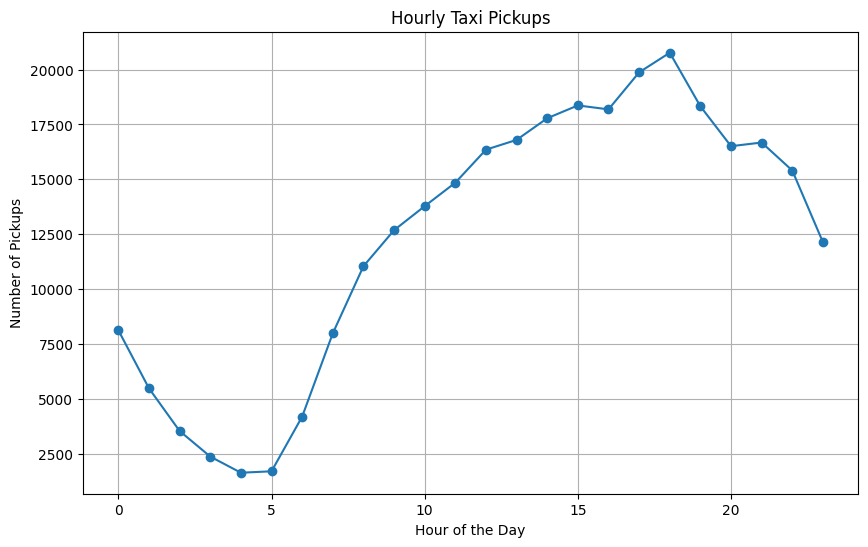

In [43]:
# Find and show the hourly trends in taxi pickups

plt.figure(figsize=(10, 6))
hourly_pickups = df['hour'].value_counts().sort_index()
plt.plot(hourly_pickups.index, hourly_pickups.values, marker='o', linestyle='-')
plt.title('Hourly Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()

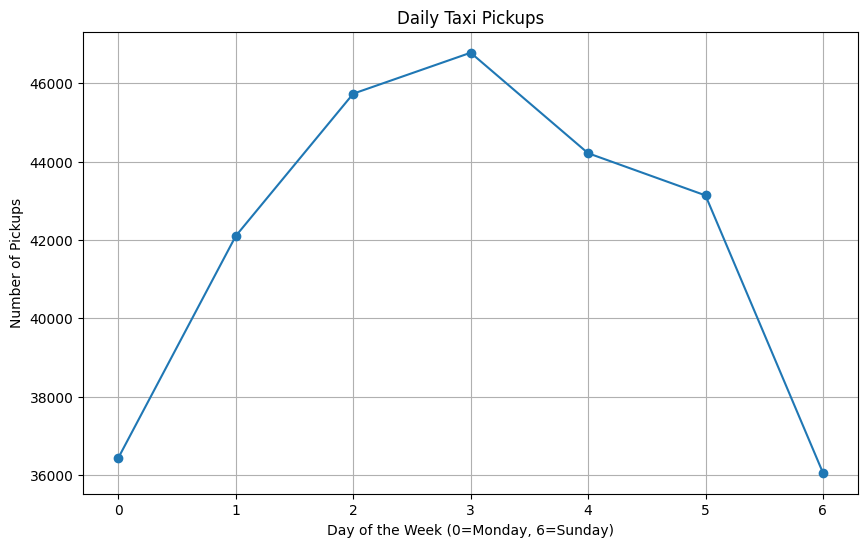

In [44]:
# Find and show the daily trends in taxi pickups (days of the week)

# Assuming 'df' is the DataFrame with 'tpep_pickup_datetime' column

# Converting 'tpep_pickup_datetime' to datetime objects
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extracting the day of the week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Grouping by day of the week and count the pickups
daily_pickups = df.groupby('day_of_week')['tpep_pickup_datetime'].count()

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(daily_pickups.index, daily_pickups.values, marker='o', linestyle='-')
plt.title('Daily Taxi Pickups')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()

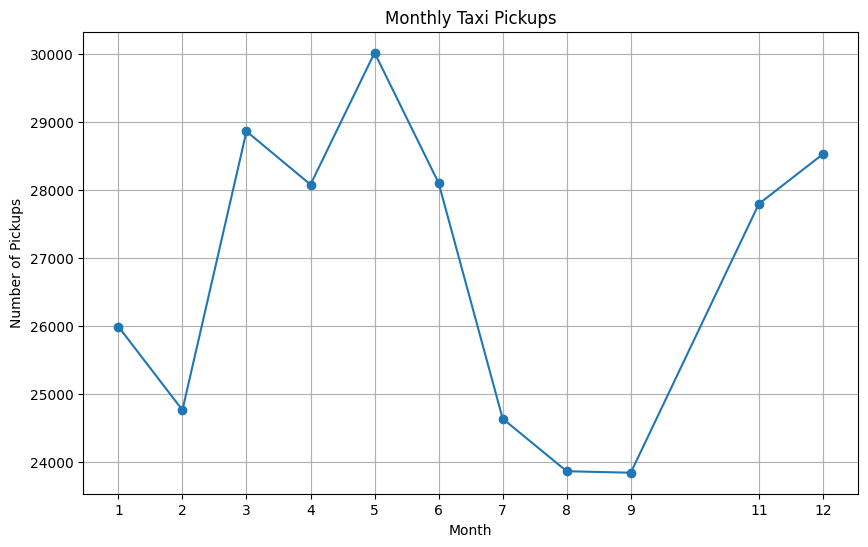

In [45]:
# Show the monthly trends in pickups
plt.figure(figsize=(10, 6))
# Assuming 'df' contains a 'tpep_pickup_datetime' column
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['month'] = df['tpep_pickup_datetime'].dt.month  # Extracting month
monthly_pickups = df['month'].value_counts().sort_index()
plt.plot(monthly_pickups.index, monthly_pickups.values, marker='o', linestyle='-')
plt.title('Monthly Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(monthly_pickups.index)  # Set x-axis ticks to show all months
plt.grid(True)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [46]:
# Checking for zero values
zero_fare = df[df['fare_amount'] == 0]
zero_tip = df[df['tip_amount'] == 0]
zero_total = df[df['total_amount'] == 0]
zero_distance = df[df['trip_distance'] == 0]

# Print the number of zero values in each column
print("Zero fare_amount:", len(zero_fare))
print("Zero tip_amount:", len(zero_tip))
print("Zero total_amount:", len(zero_total))
print("Zero trip_distance:", len(zero_distance))

Zero fare_amount: 108
Zero tip_amount: 65254
Zero total_amount: 53
Zero trip_distance: 52


In [47]:
# Analyse the above parameters

# Checking for negative values
negative_fare = df[df['fare_amount'] < 0]
negative_tip = df[df['tip_amount'] < 0]
negative_total = df[df['total_amount'] < 0]
negative_distance = df[df['trip_distance'] < 0]

# Print the number of negative values in each column
print("Negative fare_amount:", len(negative_fare))
print("Negative tip_amount:", len(negative_tip))
print("Negative total_amount:", len(negative_total))
print("Negative trip_distance:", len(negative_distance))


Negative fare_amount: 0
Negative tip_amount: 0
Negative total_amount: 0
Negative trip_distance: 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [48]:
# Create a df with non zero entries for the selected parameters.

#df already created with non zero  entries only during data cleaning process earlier in ROW NO 120.

df_none_zero = df[df['trip_distance']>0]  # No of trip_distance wherein its 0 or -ve, has been removed earlier .
#It is prudent to remove the same since 'nil' distance comprises of a very small no. within the total sample data of 3 lacs.
# Post removal of the 0 and -ve values which is lesser than 9000 or 3% of total observations,the same have been removed.

df_none_zero # reflects the presence of Non-Zero/negative values

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2023-02-21 12:45:01   2023-02-21 13:17:01              1.0   
1       2023-06-12 13:02:20   2023-06-12 13:11:18              1.0   
2       2023-04-18 22:19:32   2023-04-18 22:26:56              1.0   
3       2023-02-17 11:04:39   2023-02-17 11:11:30              1.0   
4       2023-02-28 22:19:20   2023-02-28 22:22:52              1.0   
...                     ...                   ...              ...   
299995  2023-06-06 10:58:43   2023-06-06 11:04:55              1.0   
299996  2023-08-09 08:53:25   2023-08-09 09:01:55              1.0   
299997  2023-09-16 01:13:26   2023-09-16 01:20:40              1.0   
299998  2023-01-20 19:08:29   2023-01-20 19:18:20              1.0   
299999  2023-08-04 10:39:32   2023-08-04 10:50:47              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                4.50         1.0           125           142             1   
1                1.30         1.0           229           137             1   
2                1.52         1.0           142           236             1   
3                0.97         1.0           236           141             1   
4                0.30         1.0           236           237             1   
...               ...         ...           ...           ...           ...   
299995           0.83         1.0           107           113             1   
299996           1.50         1.0           238           166             1   
299997           1.93         1.0           261           158             2   
299998           1.30         1.0            79           234             1   
299999           1.60         1.0           141           162             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0              27.5    2.5      0.5        9.45           0.0   
1              10.0    2.5      0.5        1.20           0.0   
2              10.0    1.0      0.5        3.00           0.0   
3               8.6    0.0      0.5        2.52           0.0   
4               4.4    3.5      0.5        2.00           0.0   
...             ...    ...      ...         ...           ...   
299995          7.9    0.0      0.5        3.57           0.0   
299996         10.7    0.0      0.5        2.94           0.0   
299997         10.7    1.0      0.5        0.00           0.0   
299998          9.3    5.0      0.5        3.16           0.0   
299999         12.1    2.5      0.5        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
0                         1.0         43.45                   2.5  2023-02-21   
1                         1.0         17.70                   2.5  2023-06-12   
2                         1.0         18.00                   2.5  2023-04-18   
3                         1.0         15.12                   2.5  2023-02-17   
4                         1.0         13.90                   2.5  2023-02-28   
...                       ...           ...                   ...         ...   
299995                    1.0         15.47                   2.5  2023-06-06   
299996                    1.0         17.64                   2.5  2023-08-09   
299997                    1.0         15.70                   2.5  2023-09-16   
299998                    1.0         21.46                   2.5  2023-01-20   
299999                    1.0         18.60                   2.5  2023-08-04   

        hour  day_of_week  month  
0         12            1      2  
1         13            0      6  
2         22            1      4  
3         11            4      2  
4         22            1      2  
...      ...          ...    ...  
299995    10            1      6  
299996     8            2      8  
299997     1            5      9  
299998    19            4      1  
299999    10            4      8  

[291133 rows x 20 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [49]:
# Group data by month and analyse monthly revenue

monthly_revenue = df.groupby('month')['total_amount'].sum()
print(monthly_revenue)


month
1     722003.78
2     689519.91
3     830853.45
4     818063.37
5     893544.14
6     841533.24
7     725718.06
8     705459.86
9     730978.75
11    820686.63
12    840883.22
Name: total_amount, dtype: float64


Text(0, 0.5, 'Total Revenue')

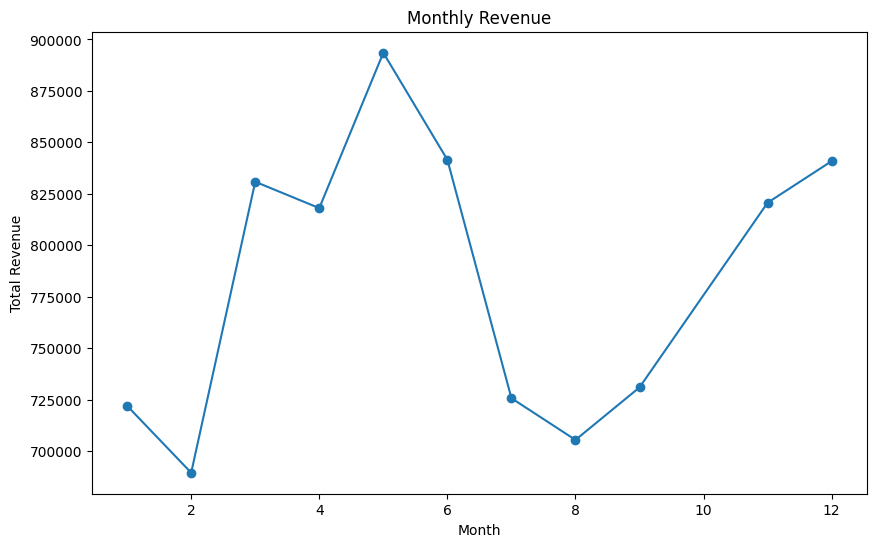

In [50]:
plt.figure(figsize=(10, 6))
monthly_revenue = df.groupby('month')['total_amount'].sum()  # Calculating the monthly revenue
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [51]:
# Calculate proportion of each quarter

df['quarter'] = df['tpep_pickup_datetime'].dt.quarter # grouping by quarter

quarterly_revenue = df.groupby('quarter')['total_amount'].sum() # rev per qtr

total_revenue = quarterly_revenue.sum()
quarter_proportions = quarterly_revenue / total_revenue

plt.figure(figsize=(8, 6))
plt.pie(quarter_proportions, labels=quarter_proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Revenue by Quarter')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [52]:
df.trip_distance.value_counts()

trip_distance
0.90     4137
1.00     4097
1.10     4032
0.80     3989
1.20     3897
         ... 
14.42       2
13.39       2
15.09       2
13.72       1
14.06       1
Name: count, Length: 2001, dtype: int64

In [53]:
# Show how trip fare is affected by distance

# Filtering data for fare amounts less than or equal to $40 to remove outliers
filtered_df = df[df['fare_amount'] <= 40]

# Creating the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.regplot(x='trip_distance', y='fare_amount', data=filtered_df)
plt.title('Trip Fare vs. Distance (Fare Amount up to $40)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

In [54]:
# Calculating the correlation coefficient
correlation_coefficient = df['trip_distance'].corr(df['fare_amount'])

#result
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.9451821222775182


**correlation coeff of 0.0548 suggests strong positive correlation**

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [55]:
# Show relationship between fare and trip duration

# Calculating the correlation coefficient
correlation_coefficient = df['fare_amount'].corr(df['hour'])

#result
print(f"Correlation Coefficient: {correlation_coefficient}")


Correlation Coefficient: -0.004529789940513914


**extremely weak correlation**

In [56]:
plt.figure(figsize=(8, 6))
sns.regplot(x='hour', y='fare_amount', data=df)
plt.title('Fare Amount vs. Trip Duration')
plt.xlabel('Trip Duration (hours)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

**weak negative correlation and as the trend line shows its almost flat**

In [57]:
# Show relationship between fare and number of passengers

# Calculating the correlation coefficient
correlation_coefficient = df['fare_amount'].corr(df['passenger_count'])

#result
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.0420276447621118


**extermely weak positive correlation or almost not correlated at  all**

In [58]:
plt.figure(figsize=(8, 6))
sns.regplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare Amount vs. No of Passengers')
plt.xlabel('Passenger count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

*fairly strong positive correlation seen*

In [59]:
# Show relationship between tip and trip distance

# Calculating the correlation coefficient
correlation_coefficient = df['tip_amount'].corr(df['trip_distance'])

#result
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.586883666851814


In [60]:
plt.figure(figsize=(8, 6))
sns.regplot(x='trip_distance', y='tip_amount', data=df,color='red')
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [61]:
# Analyse the distribution of different payment types (payment_type).
payment_type_counts = df['payment_type'].value_counts()

print(payment_type_counts)

payment_type
1    233661
2     49696
0      8052
4      1928
3      1131
Name: count, dtype: int64


**highest frequency seen in credit card usage followed by cash payments**

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [62]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [63]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file(r'/content/drive/MyDrive/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

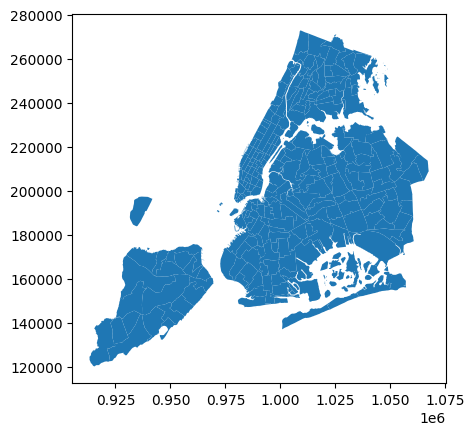

In [64]:
# print(zones.info())
# zones.plot()

print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [65]:
# Merge zones and trip records using locationID and PULocationID

merged_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')
print(merged_df.head())

  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2023-02-21 12:45:01   2023-02-21 13:17:01              1.0           4.50   
1  2023-06-12 13:02:20   2023-06-12 13:11:18              1.0           1.30   
2  2023-04-18 22:19:32   2023-04-18 22:26:56              1.0           1.52   
3  2023-02-17 11:04:39   2023-02-17 11:11:30              1.0           0.97   
4  2023-02-28 22:19:20   2023-02-28 22:22:52              1.0           0.30   

   RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0         1.0           125           142             1         27.5    2.5   
1         1.0           229           137             1         10.0    2.5   
2         1.0           142           236             1         10.0    1.0   
3         1.0           236           141             1          8.6    0.0   
4         1.0           236           237             1          4.4    3.5   

   ...  day_of_week  month  quarter  OBJECTI

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [66]:
# Group data by location and calculate the number of trips

merged_df.groupby('LocationID').value_counts()

LocationID  tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  date        hour  day_of_week  month  quarter  OBJECTID  Shape_Leng  Shape_Area  zone            borough    geometry                                         
1.0         2023-02-18 20:24:24   2023-02-18 20:24:28    1.0              0.03           5.0         1             1             1             25.0         0.0    0.0      0.00        0.0           1.0                    26.00         0.0                   2023-02-18  20    5            2      1        1.0       0.116357    0.000782    Newark Airport  EWR        POLYGON ((933100.918 192536.086, 933091.011 19...    1
            2023-03-09 19:02:51   2023-03-09 19:02:56    1.0              0.04           5.0         1             1             1             115.5        0.0    0.0      29.12       0.0           1.0                    145.62        0.0                   2023-03-09  19    3            3      1        1.0       0.116357    0.000782    Newark Airport  EWR        POLYGON ((933100.918 192536.086, 933091.011 19...    1
            2023-05-13 06:36:35   2023-05-13 06:36:42    3.0              0.01           5.0         1             1             1             140.0        0.0    0.0      28.20       0.0           1.0                    169.20        0.0                   2023-05-13  6     5            5      2        1.0       0.116357    0.000782    Newark Airport  EWR        POLYGON ((933100.918 192536.086, 933091.011 19...    1
            2023-06-09 16:53:00   2023-06-09 16:59:43    1.0              19.90          5.0         1             1             1             130.0        0.0    0.0      26.20       0.0           1.0                    157.20        0.0                   2023-06-09  16    4            6      2        1.0       0.116357    0.000782    Newark Airport  EWR        POLYGON ((933100.918 192536.086, 933091.011 19...    1
            2023-06-11 05:05:07   2023-06-11 05:05:27    1.0              0.02           5.0         1             1             1             110.0        0.0    0.0      0.00        0.0           1.0                    111.00        0.0                   2023-06-11  5     6            6      2        1.0       0.116357    0.000782    Newark Airport  EWR        POLYGON ((933100.918 192536.086, 933091.011 19...    1
                                                                                                                                                                                                                                                                                                                                                                                                                                 ..
263.0       2023-12-31 20:50:01   2023-12-31 21:17:51    1.0              11.20          1.0         263           158           1             46.4         1.0    0.5      10.28       0.0           1.0                    61.68         2.5                   2023-12-31  20    6            12     4        263.0     0.037017    0.000066    Yorkville West  Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...    1
            2023-12-31 21:34:14   2023-12-31 21:49:54    2.0              3.20           1.0         263           164           1             17.7         3.5    0.5      2.00        0.0           1.0                    27.20         2.5                   2023-12-31  21    6            12     4        263.0     0.037017    0.000066    Yorkville West  Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...    1
            2023-12-31 21:56:38   2023-12-31 22:09:48    1.0              2.48           1.0         263           142           1             14.9         1.0    0.5      5.97        0.0           1.0                    25.8

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [67]:
# Merge trip counts back to the zones GeoDataFrame

# Grouping by 'LocationID' and count trips
trip_counts = merged_df.groupby('LocationID')['tpep_pickup_datetime'].count().reset_index()

# Renaming the count column to 'trip_counts'
trip_counts = trip_counts.rename(columns={'tpep_pickup_datetime': 'trip_counts'})

# Merging trip counts back into merged_df
merged_df = pd.merge(merged_df, trip_counts, on='LocationID', how='left')

zones_with_trips = pd.merge(zones, trip_counts, on='LocationID', how='left')
print(zones_with_trips.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_counts  
0         10.0  
1          NaN  
2          3.0  
3        348.0  
4          1.0  


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [68]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones_with_trips.plot(column='trip_counts', ax=ax, legend=True, legend_kwds={'label': "trip_counts", 'orientation': "horizontal"})
plt.title("Zone-wise Taxi Trip Counts")
plt.show()

In [69]:
# can you try displaying the zones DF sorted by the number of trips?

# Sorting the zones_with_trips GeoDataFrame by trip_counts in descending order
zones_with_trips_sorted = zones_with_trips.sort_values(by='trip_counts', ascending=False)

# Displaying the sorted GeoDataFrame
print(zones_with_trips_sorted)

     OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
161       162    0.035270    0.000048           Midtown East         162   
..        ...         ...         ...                    ...         ...   
220       221    0.166218    0.000890              Stapleton         221   
239       240    0.146070    0.000722     Van Cortlandt Park         240   
244       245    0.095983    0.000466          West Brighton         245   
250       251    0.137711    0.000626            Westerleigh         251   
252       253    0.036051    0.000078          Willets Point         253   

           borough                                           geometry  \
131         Qu

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [70]:
# Visualise the number of trips per hour and find the busiest hour

# Grouping by hour and count trips
hourly_trips = df.groupby(df['tpep_pickup_datetime'].dt.hour)['tpep_pickup_datetime'].count()

#visualization
plt.figure(figsize=(10, 6))
plt.plot(hourly_trips.index, hourly_trips.values, marker='o')  # Line plot with markers
plt.title('Hourly Taxi Trip Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

In [71]:
# the busiest hour
busiest_hour = hourly_trips.idxmax()
print(f"The busiest hour is: {busiest_hour}")

The busiest hour is: 18


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [72]:
# top 5 busiest hours
busiest_hours = hourly_trips.sort_values(ascending=False).head(5).index

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
actual_trips_busiest_hours = hourly_trips[busiest_hours] / sample_fraction

#results
print("Actual no of Trips in the Five Busiest Hours:")
print(actual_trips_busiest_hours)

Actual no of Trips in the Five Busiest Hours:
tpep_pickup_datetime
18    415300.0
17    397420.0
15    367280.0
19    366460.0
16    363680.0
Name: tpep_pickup_datetime, dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

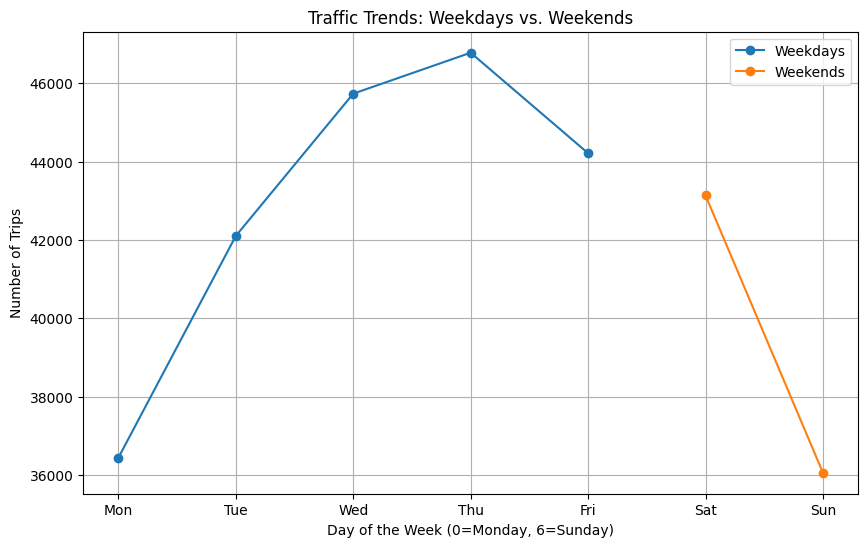

In [73]:
# Compare traffic trends for the week days and weekends

# Extracting day of the week
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Grouping and aggregating
daily_trips = df.groupby('day_of_week')['tpep_pickup_datetime'].count()

# Separating weekdays and weekends
weekdays = daily_trips[daily_trips.index < 5]  # Monday (0) to Friday (4)
weekends = daily_trips[daily_trips.index >= 5]  # Saturday (5) and Sunday (6)

# Visualizing
plt.figure(figsize=(10, 6))
plt.plot(weekdays.index, weekdays.values, marker='o', label='Weekdays')
plt.plot(weekends.index, weekends.values, marker='o', label='Weekends')
plt.title('Traffic Trends: Weekdays vs. Weekends')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Trips')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Custom labels
plt.legend()
plt.grid(True)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [86]:
# Find top 10 pickup and dropoff zones

# ConvertING 'tpep_dropoff_datetime' to datetime objects before using .dt accessor
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

#Grouping by zone and hour
hourly_pickups_by_zone = df.groupby(['PULocationID', df['tpep_pickup_datetime'].dt.hour])['tpep_pickup_datetime'].count()
hourly_dropoffs_by_zone = df.groupby(['DOLocationID', df['tpep_dropoff_datetime'].dt.hour])['tpep_dropoff_datetime'].count()

# Sorting and selecting top 10 zones
top_10_zones_pickups = hourly_pickups_by_zone.groupby('PULocationID').sum().sort_values(ascending=False).head(10)
top_10_zones_dropoffs = hourly_dropoffs_by_zone.groupby('DOLocationID').sum().sort_values(ascending=False).head(10)

#results
print("Top 10 Zones with High Hourly Pickups:")
print(top_10_zones_pickups)

print("\nTop 10 Zones with High Hourly Dropoffs:")
print(top_10_zones_dropoffs)

Top 10 Zones with High Hourly Pickups:
PULocationID
132    15113
237    13935
161    13617
236    12444
162    10366
186    10106
138    10082
230     9764
142     9701
170     8763
Name: tpep_pickup_datetime, dtype: int64

Top 10 Zones with High Hourly Dropoffs:
DOLocationID
236    12870
237    12338
161    11482
230     9109
170     8791
162     8419
142     8321
239     8257
141     7906
68      7385
Name: tpep_dropoff_datetime, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Calculating pickups and dropoffs per zone
pickups_by_zone = df.groupby('PULocationID')['PULocationID'].count()
dropoffs_by_zone = df.groupby('DOLocationID')['DOLocationID'].count()

# ratios
ratios = pickups_by_zone / dropoffs_by_zone

# highest and lowest ratios
top_10_ratios = ratios.sort_values(ascending=False).head(10)
bottom_10_ratios = ratios.sort_values(ascending=True).head(10)

#results
print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios)

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_ratios)

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

 # Filtering night hours (11 PM to 5 AM)
night_hours_df = df[(df['tpep_pickup_datetime'].dt.hour >= 23) | (df['tpep_pickup_datetime'].dt.hour <= 5)]

#Grouping by zone and count
night_pickups_by_zone = night_hours_df.groupby('PULocationID')['PULocationID'].count()
night_dropoffs_by_zone = night_hours_df.groupby('DOLocationID')['DOLocationID'].count()

# Sorting and selecting top 10 zones
top_10_pickup_zones = night_pickups_by_zone.sort_values(ascending=False).head(10)
top_10_dropoff_zones = night_dropoffs_by_zone.sort_values(ascending=False).head(10)

# results
print("Top 10 Pickup Zones during Night Hours:")
print(top_10_pickup_zones)

print("\nTop 10 Dropoff Zones during Night Hours:")
print(top_10_dropoff_zones)

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)
nighttime_start = 23  # 11 PM
nighttime_end = 5    # 5 AM

# Filtering data
nighttime_trips = df[(df['tpep_pickup_datetime'].dt.hour >= nighttime_start) | (df['tpep_pickup_datetime'].dt.hour < nighttime_end)]
daytime_trips = df[(df['tpep_pickup_datetime'].dt.hour >= nighttime_end) & (df['tpep_pickup_datetime'].dt.hour < nighttime_start)]

# Calculating revenue
nighttime_revenue = nighttime_trips['total_amount'].sum()
daytime_revenue = daytime_trips['total_amount'].sum()
total_revenue = df['total_amount'].sum()

# Calculating revenue share
nighttime_share = nighttime_revenue / total_revenue
daytime_share = daytime_revenue / total_revenue

#results
print(f"Nighttime Revenue Share: {nighttime_share:.2%}")
print(f"Daytime Revenue Share: {daytime_share:.2%}")

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts

# fare per mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# fare per mile per passenger
df['fare_per_mile_per_passenger'] = df['fare_per_mile'] / df['passenger_count']

#Grouping by passenger count and calculate average
average_fare_by_passenger_count = df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

#results
print("Average Fare per Mile per Passenger for Different Passenger Counts:")
print(average_fare_by_passenger_count)

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
#Compare the average fare per mile for different days andd for different times of the day

#Group and aggregate
hourly_fare_per_mile = df.groupby(df['tpep_pickup_datetime'].dt.hour)['fare_per_mile'].mean()
daily_fare_per_mile = df.groupby(df['tpep_pickup_datetime'].dt.dayofweek)['fare_per_mile'].mean()

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns of plots

# Plotting for hourly comparison
axes[0].plot(hourly_fare_per_mile.index, hourly_fare_per_mile.values, marker='o')
axes[0].set_title('Average Fare per Mile by Hour of the Day')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Average Fare per Mile')
axes[0].grid(True)

# Plotting for daily comparison
axes[1].plot(daily_fare_per_mile.index, daily_fare_per_mile.values, marker='o')
axes[1].set_title('Average Fare per Mile by Day of the Week')
axes[1].set_xlabel('Day of the Week (0=Mon, 6=Sun)')
axes[1].set_ylabel('Average Fare per Mile')
axes[1].set_xticks(range(7))  # Set x-axis ticks for all days
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Day labels
axes[1].grid(True)

plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers

# Calculating fare per mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Replacing infinite values with NaN
df['fare_per_mile'] = df['fare_per_mile'].replace([np.inf, -np.inf], np.nan)

# Removing NaN values
df = df.dropna(subset=['fare_per_mile'])

# Grouping by hour, then calculating average fare per mile (since VendorID was removed)
average_fare_by_hour = df.groupby(df['tpep_pickup_datetime'].dt.hour)['fare_per_mile'].mean()

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(average_fare_by_hour.index, average_fare_by_hour.values, marker='o')
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.grid(True)
plt.tight_layout()  # Adjusting spacing
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculating tip percentage
df['tip_percentage'] = (df['tip_amount'] / df['total_amount']) * 100

# Replacing infinite values with NaN
df['tip_percentage'] = df['tip_percentage'].replace([np.inf, -np.inf], np.nan)

# Removing NaN values
df = df.dropna(subset=['tip_percentage'])


# Tip Percentage vs. Distance
plt.figure(figsize=(10, 6))
sns.regplot(x='trip_distance', y='tip_percentage', data=df, scatter_kws={'alpha':0.5})
plt.title('Tip Percentage vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Percentage (%)')
plt.show()

# Correlation coefficient
correlation = df['trip_distance'].corr(df['tip_percentage'])
print(f"Correlation between trip distance and tip percentage: {correlation}")



#Tip Percentage vs Passenger Count
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='tip_percentage', data=df)
plt.title('Tip Percentage vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage (%)')
plt.show()


# Tip Percentage vs Pickup Time (Hour of the Day)
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
plt.figure(figsize=(10, 6))
sns.boxplot(x='pickup_hour', y='tip_percentage', data=df)
plt.title('Tip Percentage vs. Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Tip Percentage (%)')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Filter for low and high tip percentages
low_tip_trips = df[df['tip_percentage'] < 10]
high_tip_trips = df[df['tip_percentage'] > 25]

# Compare characteristics-trip distance, passenger count, payment type)
print("Low Tip Trips:")
print(low_tip_trips[['trip_distance', 'passenger_count', 'payment_type', 'fare_amount']].describe())

print("\nHigh Tip Trips:")
print(high_tip_trips[['trip_distance', 'passenger_count', 'payment_type', 'fare_amount']].describe())


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days

# Passenger Count vs Hour of the Day
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['tpep_pickup_datetime'].dt.hour, y='passenger_count', data=df)
plt.title('Passenger Count Variation across Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Passenger Count')
plt.show()

# Passenger Count vs Day of the Week
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['tpep_pickup_datetime'].dt.dayofweek, y='passenger_count', data=df)
plt.title('Passenger Count Variation across Days')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Passenger Count')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Custom labels for days
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones

# Passenger Count Variation across Zones (Pickup Locations)
plt.figure(figsize=(8, 6))
sns.boxplot(x='PULocationID', y='passenger_count', data=df)
plt.title('Passenger Count Variation across Pickup Zones')
plt.xlabel('Pickup Zone ID')
plt.ylabel('Passenger Count')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()


In [75]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Grouping the dataframe 'df' by 'PULocationID' and calculate the mean of 'passenger_count'
# for each zone.
average_passengers_by_zone = df.groupby('PULocationID')['passenger_count'].mean()

# Merging this Series with the 'zones_with_trips' GeoDataFrame using 'LocationID' as the key.
# This adds a new column 'avg_passengers' to the GeoDataFrame,containing the average passenger count for each zone.
zones_with_trips = pd.merge(zones_with_trips, average_passengers_by_zone, left_on='LocationID', right_index=True, how='left')

# Renaming the column to 'avg_passengers'
zones_with_trips = zones_with_trips.rename(columns={'passenger_count': 'avg_passengers'})

# Display the updated Geo dataframe
print(zones_with_trips.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_counts  avg_passengers  
0         10.0        1.400000  
1          NaN             NaN  
2          3.0   

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [80]:
# How often is each surcharge applied?

# Defining the surcharge columns
surcharge_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'tolls_amount', 'congestion_surcharge']

# Creating dataframe to store the results
surcharge_frequency = pd.DataFrame(index=surcharge_columns, columns=['Frequency'])

# Calculating the frequency and percentage for each surcharge
for surcharge in surcharge_columns:
    # Counting the number of times the surcharge is greater than 0
  frequency = (df[surcharge] > 0).sum()

    # Storing the results in the dataframe
  surcharge_frequency.loc[surcharge] = [frequency]

# results
print(surcharge_frequency)

                      Frequency
extra                    178844
mta_tax                  292455
improvement_surcharge    294399
tolls_amount              23871
congestion_surcharge     273954


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

  **4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Recommendations for Routing and Dispatching Optimization**

**1. Demand-Based Dispatching:**
Peak Hour Dispatching: During peak hours (identified as 16:00-20:00), increase the number of taxis dispatched to high-demand zones like Manhattan's Midtown, Upper East Side, and the Financial District. Consider implementing a surge pricing model during these periods to incentivize drivers to operate in these areas, ensuring sufficient taxi availability.

**Nighttime Dispatching:** During night hours (23:00 - 5:00), focus on dispatching taxis to zones identified with higher night-time demand, like LaGuardia and JFK Airports and central areas of Manhattan. Consider offering late-night promotions or route optimization to popular nightlife destinations to attract more customers.

**Zone-Based Dispatching**: Direct drivers towards pickup zones with higher pickup/dropoff ratios, like zone 237, 161, and 138. Strategically position empty cabs in anticipation of high-demand periods in specific zones. Explore dynamic pricing for zones with consistently high demand to balance supply and demand.

**Weekday vs. Weekend:** Adjust dispatching strategies based on the daily demand patterns. Increase the taxi supply in high-demand zones during weekdays and cater to the specific demand patterns observed during weekends. For example, weekends may have higher demand in entertainment districts.

**2. Route Optimization:**
Slow Route Mitigation: Identify and address the reasons for slow routes (refer to Section 3.2.1 in the code). These bottlenecks could be caused by traffic, construction, or poor road conditions. Consider providing alternative route suggestions or real-time traffic updates to drivers to minimize delays and improve trip times.

**Traffic Prediction Integration:** Use historical traffic data and real-time traffic information to predict traffic congestion, and adjust routes accordingly. Integrate real-time traffic data feeds into dispatch systems, enabling drivers to avoid heavily congested areas and find faster routes.

**GPS and Navigation Support:** Integrate efficient navigation systems into the taxi dispatch infrastructure. Providing GPS devices or navigation apps to drivers will help them find optimized routes based on real-time conditions, reducing fuel costs and improving customer experience.

**3. Fleet Management and Driver Communication:**
Driver Incentives: Implement a bonus system to incentivize drivers to accept trips during low-demand hours or to less popular zones. This will ensure adequate coverage and service availability throughout the city.

**Driver Feedback:** Continuously collect feedback from drivers on route efficiency, traffic patterns, and passenger demand. Use this feedback to refine routing and dispatching strategies. Create a dedicated driver communication channel for real-time alerts, route suggestions, and service updates.

**Fleet Sizing:** Adjust the number of active taxis in the fleet based on the hourly and daily demand patterns. Optimize fleet size to meet passenger demand, minimizing idle times for drivers and ensuring efficient resource allocation.

**Predictive Demand Modeling:** Develop and implement predictive demand models using historical trip data, weather information, special events, and other relevant variables. Leverage these models to forecast future demand patterns and optimize resource allocation accordingly.




**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1**. Leverage Peak Hours and Days:**

**High-Demand Zones**: Position more cabs in the top 10 zones with high hourly pickups and drop-offs during peak hours and days. These are your prime areas for maximizing trip opportunities.
**Weekday vs. Weekend:** Adjust your cab distribution based on weekday and weekend traffic patterns. During weekdays, prioritize business districts and transportation hubs. On weekends, focus on entertainment areas and residential neighborhoods.

**2**.**Address Nighttime Demand:**
**Nighttime Hotspots**: Increase cab presence in zones with high pickup and drop-off traffic during night hours (11 PM to 5 AM). These areas likely include nightlife districts, airports, and major transportation hubs that operate overnight.

**3. Optimize for Location Imbalances:**
**Pickup/Drop-off Ratios:** Use pickup/drop-off ratios to identify areas with imbalances. If a zone consistently has more pickups than drop-offs, consider positioning extra cabs there to ensure availability. Conversely, if drop-offs significantly exceed pickups, encourage drivers to relocate to zones with higher pickup potential.

4.**Seasonal Adjustments:**

**Monthly Trends:** Adjust cab distribution based on monthly trends. If you see a surge in demand during specific months or events (e.g., holidays, festivals), allocate more cabs to popular destinations or event venues during those times.

5. **Dynamic Allocation**:

**Real-time Monitoring:** Consider implementing a dynamic allocation system that adjusts cab positioning based on real-time demand. This could involve using GPS tracking and historical data to predict hotspots and direct drivers accordingly.

6.**Partnerships and Events**

**Strategic Collaborations:** Partner with event organizers or businesses to pre-position cabs for large events or conferences. This ensures efficient transportation for attendees and reduces wait times.

7**. Zone-Specific Incentives:**

**Driver Incentives:** Offer incentives to drivers who operate in zones with high demand or those experiencing imbalances. This could include higher fares, priority dispatch, or bonus payments to encourage drivers to serve those areas.

8**. Customer Experience:**

Reduce Wait Times: By strategically positioning cabs, you aim to reduce wait times for passengers, improving overall customer satisfaction.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

**1. Dynamic Pricing Based on Time and Demand**

**Peak Hours**: Implement a surge pricing model during peak demand hours (e.g., rush hour, weekend evenings). This adjusts fares based on real-time demand and helps maximize revenue during busy periods. Consider using a tiered surge pricing approach with different multipliers for different levels of demand.
**Off-Peak Hours**: Offer discounts or promotional fares during off-peak hours to incentivize ridership and maintain competitiveness. This can attract customers during slower periods and boost revenue.

2.**Distance-Based Fare Adjustments**:

Tiered Fare Structure: Implement a tiered fare structure based on distance traveled. The code analysis suggests analyzing fare-per-mile rates for trips up to 2 miles, 2-5 miles, and over 5 miles. This allows for a more granular pricing model that reflects the cost of longer trips.
Minimum Fare: Consider implementing or adjusting a minimum fare to ensure profitability on short trips and cover operational costs.

3. **Passenger Count Considerations**:

**Group Discounts**: Offer discounts for trips with multiple passengers, particularly during off-peak hours. This can encourage group travel and fill taxis more efficiently.
**Per-Passenger Surcharge**: For trips with a high number of passengers (e.g., 5 or 6), consider a small per-passenger surcharge to cover the additional costs associated with carrying more people.

4. **Vendor Differentiation and Competition**:

**Competitive Analysis**: Conduct ongoing analysis of competitor pricing strategies to ensure that rates remain competitive. Adjust prices in response to competitor changes while maintaining profitability.
Vendor-Specific Pricing: Consider offering vendor-specific pricing tiers or promotions to differentiate services and attract specific customer segments. This could involve premium or economy options.

5. **Zone-Based Pricing**:

High-Demand Zones: Introduce surge pricing or zone-specific surcharges for trips originating or ending in high-demand zones during peak hours. This reflects the increased demand and value of service in these areas.
Low-Demand Zones: Offer discounts or incentives for trips in low-demand zones to stimulate ridership and broaden service coverage.

6. **Data-Driven Optimization**:

Continuous Monitoring: Implement a system for continuous monitoring of key performance indicators (KPIs) such as revenue per trip, average trip distance, passenger counts, and tip percentages.
Iterative Adjustments: Make iterative adjustments to the pricing strategy based on ongoing data analysis and market feedback. This allows for a dynamic and responsive pricing model that optimizes revenue and customer satisfaction over time.

7. **Transparency and Communication**:

Clear Fare Structure: Clearly communicate fare rates to passengers, including any dynamic pricing adjustments. This builds trust and transparency.
In-App Notifications: Utilize in-app notifications or alerts to inform passengers of surge pricing or promotional offers.

8. **Potential for Optimization from Surcharges**

It was found that "extra", "mta_tax", "improvement_surcharge", "tolls_amount", and "congestion_surcharge" are applied at different rates. Explore the timing and location context behind these surcharges and assess if their current pricing maximizes revenue.